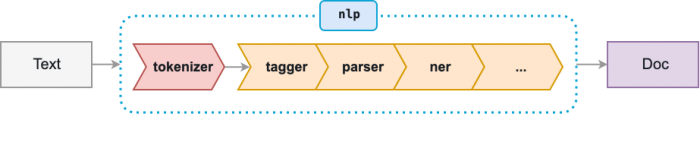

In [1]:
from IPython.display import Image
Image('/home/naveens/Pictures/spacypipeline.png')

In [2]:
import spacy
import pandas as pd
from spacy import displacy
from spacy.matcher import Matcher
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
model = spacy.load('en_core_web_sm') #Pre-trained model

In [4]:
doc = model('My name is John and I was born on 23rd June 1987. \
           I work at Pramati from Hyderabad. I just bought a cricket bat \
           cost $100 from amazon and I will get is knock here for $5. I love Java')

In [5]:
displacy.render(doc,style='ent')

In [6]:
model.pipeline

[('tagger', <spacy.pipeline.pipes.Tagger at 0x7fa36a1aa4e0>),
 ('parser', <spacy.pipeline.pipes.DependencyParser at 0x7fa36a0ac8e8>),
 ('ner', <spacy.pipeline.pipes.EntityRecognizer at 0x7fa36a0ac948>)]

In [7]:
doc = model('My name is Jhon and I was born on 23rd June 1987')

In [8]:
doc.ents

(Jhon, 23rd June 1987)

In [9]:
model.remove_pipe('ner')

('ner', <spacy.pipeline.pipes.EntityRecognizer at 0x7fa36a0ac948>)

In [10]:
doc = model('My name is Jhon and I was born on 23rd June 1987')
doc.ents

()

In [11]:
TRAIN_DATA = [
   ("Python is cool", {"entities": [(0, 6, "PROGLANG")]}),
   ("Me like golang", {"entities": [(8, 14, "PROGLANG")]}),
   (("Yu like Java", {"entities": [(8, 14, "PROGLANG")]})),
   ('How to set up unit testing for Visual Studio C++',{'entities': [(45, 48, 'PROGLANG')]}),
   ('How do you pack a visual studio c++ project for release?',{'entities': [(32, 35, 'PROGLANG')]}),
   ('How do you get leading wildcard full-text searches to work in SQL Server?',{'entities': [(62, 65, 'PROGLANG')]}) 
]

# Create Pipleline

In [12]:
def create_blank_nlp(train_data):
    nlp = spacy.blank("en")
    ner = nlp.create_pipe("ner")
    nlp.add_pipe(ner, last=True)
    ner = nlp.get_pipe("ner")
    for _, annotations in train_data:
        for ent in annotations.get("entities"):
            ner.add_label(ent[2])
    return nlp  

# Training

In [14]:
import random 
import datetime as dt

nlp = create_blank_nlp(TRAIN_DATA)
optimizer = nlp.begin_training()  
for i in range(10):
    random.shuffle(TRAIN_DATA)
    losses = {}
    for text, annotations in TRAIN_DATA:
        nlp.update([text], [annotations], sgd=optimizer, losses=losses)
    print(f"Losses at iteration {i} - {dt.datetime.now()}", losses)

Losses at iteration 0 - 2020-04-02 16:32:15.424872 {'ner': 31.314920783042908}
Losses at iteration 1 - 2020-04-02 16:32:15.611837 {'ner': 10.97015359182842}
Losses at iteration 2 - 2020-04-02 16:32:15.816753 {'ner': 7.877175423738663}
Losses at iteration 3 - 2020-04-02 16:32:16.028793 {'ner': 3.2332747967880096}
Losses at iteration 4 - 2020-04-02 16:32:16.224800 {'ner': 0.28086886339659145}
Losses at iteration 5 - 2020-04-02 16:32:16.423484 {'ner': 0.004531069510554993}
Losses at iteration 6 - 2020-04-02 16:32:16.609245 {'ner': 2.2568460881800204e-06}
Losses at iteration 7 - 2020-04-02 16:32:16.801169 {'ner': 5.052284067680721e-08}
Losses at iteration 8 - 2020-04-02 16:32:16.989368 {'ner': 6.320557942583732e-09}
Losses at iteration 9 - 2020-04-02 16:32:17.183278 {'ner': 1.1437253544470465e-09}


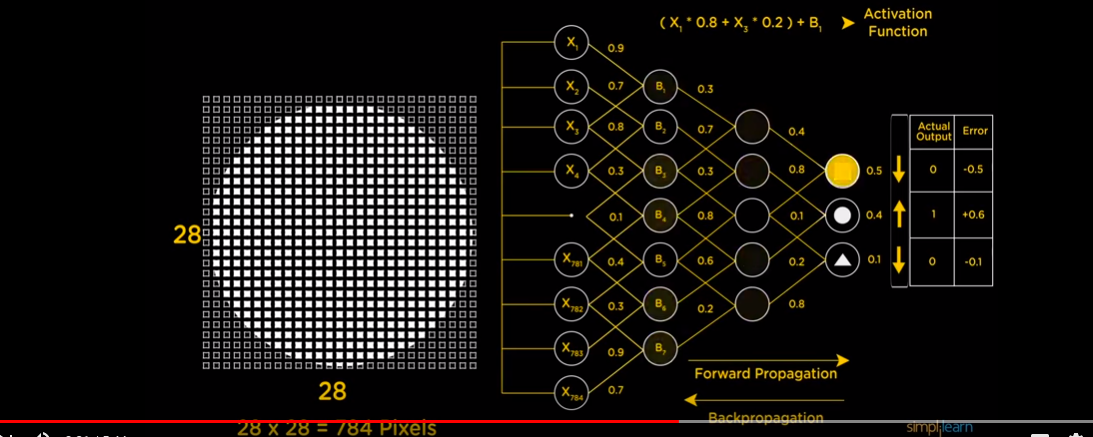

In [13]:
Image('/home/naveens/Pictures/nurealnetwork.png')

# Test 

In [15]:
doc = nlp("i write code in datascience")
displacy.render(doc, style="ent")

In [16]:
doc = nlp("i write code in javascript")
displacy.render(doc, style="ent")

In [17]:
doc = nlp("Python will be most use language")
displacy.render(doc, style="ent")